<a href="https://colab.research.google.com/github/Bleak-Moon/self-driving-car/blob/main/hand_signal3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
!pip install mediapipe
import cv2
import mediapipe as mp
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
from google.colab.patches import cv2_imshow
from os import path
import numpy as np

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(path.join('/content/drive/MyDrive', filename), 'wb') as f:
    f.write(binary)
  return filename

In [63]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

Saved to photo.jpg


Handedness: [classification {
  index: 0
  score: 1.0
  label: "Left"
}
]
Handedness of photo.jpg:
[classification {
  index: 0
  score: 1.0
  label: "Left"
}
]
Hand landmarks of photo.jpg:
hand_landmarks: landmark {
  x: 0.3685481548309326
  y: 0.7330814599990845
  z: -6.370760820573196e-05
}
landmark {
  x: 0.4449351131916046
  y: 0.6869930028915405
  z: -0.06155510991811752
}
landmark {
  x: 0.5013508796691895
  y: 0.5915013551712036
  z: -0.10263010114431381
}
landmark {
  x: 0.4940948486328125
  y: 0.4820294976234436
  z: -0.1376945674419403
}
landmark {
  x: 0.4430913031101227
  y: 0.43267756700515747
  z: -0.14805568754673004
}
landmark {
  x: 0.48121026158332825
  y: 0.5025796890258789
  z: 0.008258159272372723
}
landmark {
  x: 0.4876851439476013
  y: 0.409507691860199
  z: -0.06347665190696716
}
landmark {
  x: 0.4763891100883484
  y: 0.49413809180259705
  z: -0.06571841984987259
}
landmark {
  x: 0.47147366404533386
  y: 0.529281497001648
  z: -0.03522922471165657
}
landmark

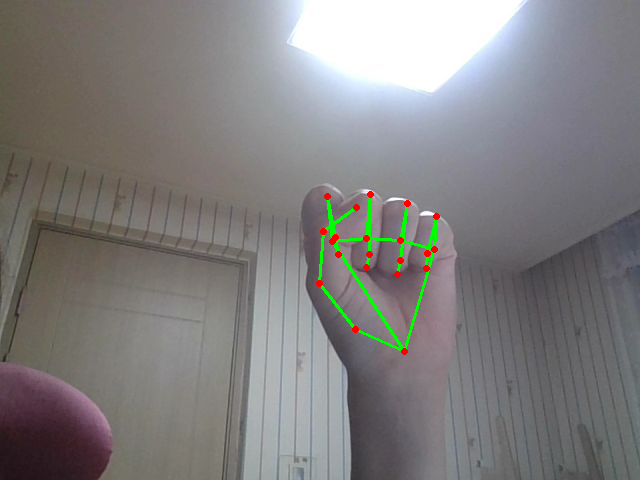

In [64]:
image = cv2.imread('/content/drive/MyDrive/photo.jpg')
 
with mp_hands.Hands(static_image_mode = False, min_detection_confidence=0.7, min_tracking_confidence=0.7, max_num_hands=2) as hands:
  # Convert the BGR image to RGB before processing
  results = hands.process(cv2.flip(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 1))

  # Print handedness and draw hand landmarks on the image
  print('Handedness:', results.multi_handedness)
  image_height, image_width, _ = image.shape
  # Print handedness (left vs. right hand).
  print(f'Handedness of photo.jpg:')
  print(results.multi_handedness)
    
  # Draw hand landmarks of each hand.
  print(f'Hand landmarks of photo.jpg:')
  if results.multi_hand_landmarks != None:
    annotated_image = cv2.flip(image.copy(), 1)
    for hand_landmarks in results.multi_hand_landmarks:
      print('hand_landmarks:', hand_landmarks)
      print(f'Index finger tip coordinates: (', f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, ' f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})')

      mp_drawing.draw_landmarks(annotated_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    cv2_imshow(cv2.flip(annotated_image, 1))

cv2.destroyAllWindows()

In [65]:
import re
separators = 'landmark', '{', ':', '}', 'x', 'y', 'z', '\n'

def custom_split(sepr_list, str_to_split):
  # create regular expression dynamically
  regular_exp = '|'.join(map(re.escape, sepr_list))
  return re.split(regular_exp, str_to_split)

coordinate = []
for i in custom_split(separators, str(hand_landmarks)):
  if "0." in i or "-" in i:
    coordinate.append(i)
print(coordinate)

l = len(coordinate)
lmList = []
for i in range(l // 3):
  line = []
  for j in range(3):
    line.append(0)
  lmList.append(line)

print(len(lmList))

for i in range(len(lmList)):
  for j in range(3):
    lmList[i][j] = float(coordinate[j + 3 * i])

print(lmList)

[' 0.3685481548309326', ' 0.7330814599990845', ' -6.370760820573196e-05', ' 0.4449351131916046', ' 0.6869930028915405', ' -0.06155510991811752', ' 0.5013508796691895', ' 0.5915013551712036', ' -0.10263010114431381', ' 0.4940948486328125', ' 0.4820294976234436', ' -0.1376945674419403', ' 0.4430913031101227', ' 0.43267756700515747', ' -0.14805568754673004', ' 0.48121026158332825', ' 0.5025796890258789', ' 0.008258159272372723', ' 0.4876851439476013', ' 0.409507691860199', ' -0.06347665190696716', ' 0.4763891100883484', ' 0.49413809180259705', ' -0.06571841984987259', ' 0.47147366404533386', ' 0.529281497001648', ' -0.03522922471165657', ' 0.42687663435935974', ' 0.49625396728515625', ' 0.008897768333554268', ' 0.42162391543388367', ' 0.4060681462287903', ' -0.09093759953975677', ' 0.4233939051628113', ' 0.5304752588272095', ' -0.08536476641893387', ' 0.4267725348472595', ' 0.556460976600647', ' -0.0333336777985096', ' 0.37461334466934204', ' 0.5016283392906189', ' -0.007400371599942446',

0


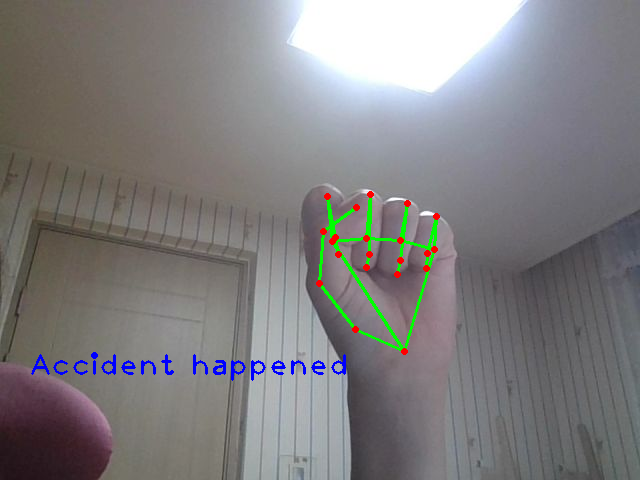

In [66]:

tipIds = [4, 8, 12, 16, 20]
img = cv2.flip(annotated_image, 1)
fingers = []

if lmList[tipIds[0]][1] > lmList[tipIds[0] - 1][1]:
  fingers.append(1)
else:
  fingers.append(0)

for id in range(1, 5):
  if lmList[tipIds[id]][2] < lmList[tipIds[id] - 2][2]:
    fingers.append(1)
  else:
    fingers.append(0)

# print(fingers)
totalFingers = fingers.count(1)
print(totalFingers)

def traffic_signal(totalFingers):
  if totalFingers == 0:
    return "Accident happened"
  elif totalFingers == 2:
    return "There is(are) passenger(s)"
  elif totalFingers == 5:
    return "Thank You"
  else:
    return "Enjoy your drive"

cv2.putText(img, traffic_signal(totalFingers), (30, 375), cv2.FONT_HERSHEY_PLAIN, 2, (255, 0, 0), 2)

cv2_imshow(img)